## Cyclotron Motion in Plasmas

In [27]:
import em2d
import numpy
import numpy as np
# Time step
dt = 0.01

# Simulation time
tmax = 22.8

# Number of cells
nx  = [32,32]

# Simulation box size
box = [3,3]


## Background plasma

# Particles per cell
ppc = [1,1]

dens=em2d.Density( type = "slab", start = 1.4,end=1.6)
dens.n=1e-6
# Use a step density profile
electrons = em2d.Species( "electrons", -1, ppc,
                           density = dens,ufl=[0.1,0,0])

dens2=em2d.Density( type = "slab", start = 1.4,end=1.6)
dens2.n=1e-6
positrons = em2d.Species( "positrons", 2, ppc,
                           density = dens2,ufl=[0.1,0,0])

# Initialize simulation
sim = em2d.Simulation( nx, box, dt, species = (electrons,positrons) )


def ext_B(x,y):
    return [0,0,1]

def ext_E(x,y):
    return [0,0,0]

ex=em2d.Ext_Field(sim,ext_E=ext_E,ext_B=ext_B)

#arays to store the particles trajectories
pos_part_rep =[]
ele_part_rep =[]

def itera():
    sim.current.zero()
    species=sim.get_species()
    for spec in species:
        spec.advance(sim)

    sim.current.update()
    sim.emf.advance(sim)
    ex.update_ext(sim)
    sim.advance()
    #store the electron trajectories
    ele_part_rep.append(sim.get_species()[0].particles[30].copy())
    #store the positron(ish) trajectories
    pos_part_rep.append(sim.get_species()[1].particles[29].copy())


while sim.t < 2*0.75*np.pi:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    itera()

In [8]:
#convert trajectories to position arrays
e_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in ele_part_rep]
e_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in ele_part_rep]

p_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in pos_part_rep]
p_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in pos_part_rep]

#create time array
t=np.linspace(0,sim.t,sim.n)

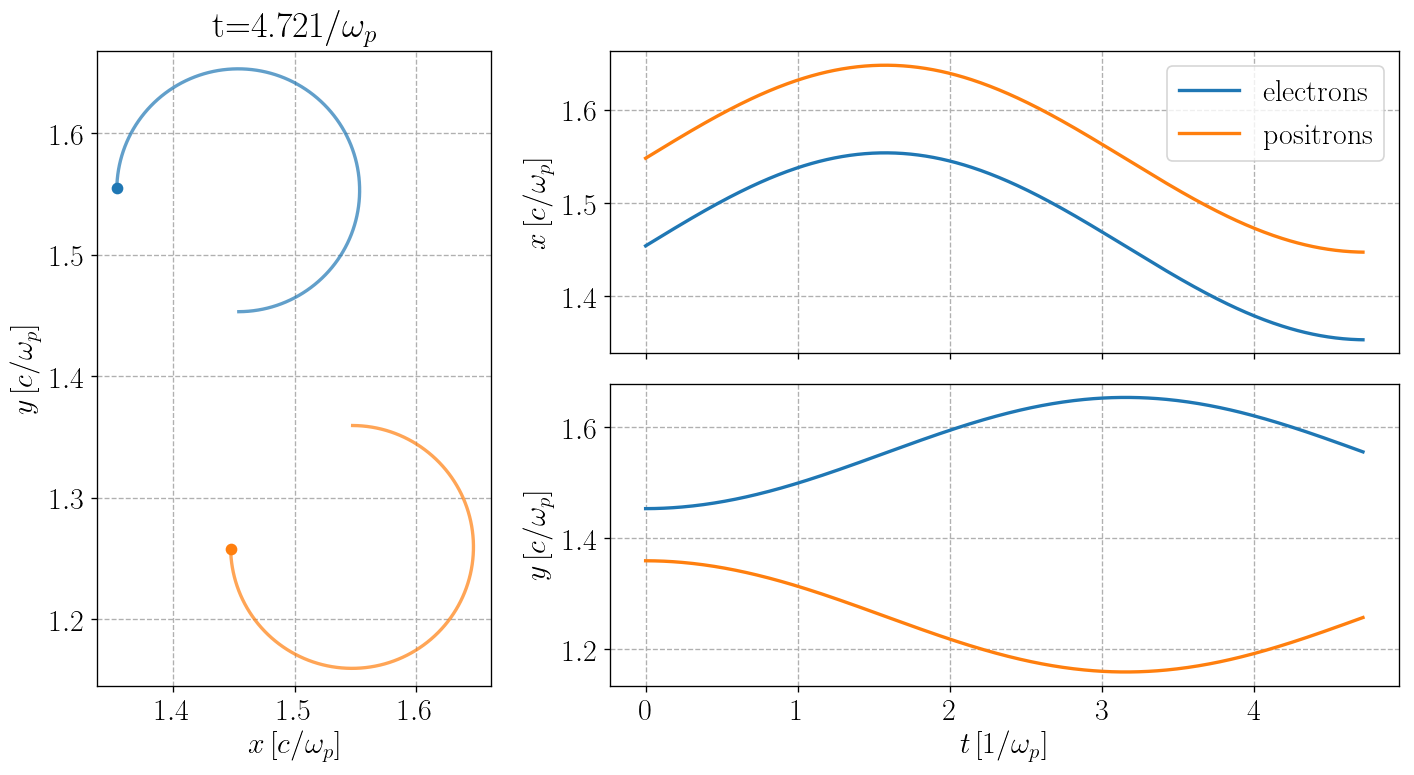

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({'font.size': 18})
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = 'True')
gs2 = gridspec.GridSpec(2, 2, hspace=0.1,width_ratios=[1, 2])

ax = plt.subplot(gs2[:, 0])
ax.plot(e_posx_t,e_posy_t,lw=2,alpha=0.7)
ax.scatter(e_posx_t[-1],e_posy_t[-1])
ax.plot(p_posx_t,p_posy_t,lw=2,alpha=0.7)
ax.scatter(p_posx_t[-1],p_posy_t[-1])
ax.grid(True,ls="--")
ax.set_xlabel("$x\,[c/\omega_p]$")
ax.set_ylabel("$y\,[c/\omega_p]$")
ax.set_aspect('equal', 'datalim')
ax.set_title("t={:.2f}$1/\omega_p$".format(sim.t))

ax2 = plt.subplot(gs2[0,1])
ax2.plot(t,e_posx_t,lw=2,label="electrons")
ax2.plot(t,p_posx_t,lw=2,label="positrons")
ax2.set_xticklabels([])
ax2.grid(True,ls="--")
ax2.set_ylabel("$x\,[c/\omega_p]$")
ax2.legend()

ax3 = plt.subplot(gs2[1,1])
ax3.plot(t,e_posy_t,lw=2)
ax3.plot(t,p_posy_t,lw=2)
ax3.set_ylabel("$y\,[c/\omega_p]$")
ax3.set_xlabel("$t\,[1/\omega_p]$")
ax3.grid(True,ls="--")
plt.show()

In [28]:
while sim.t < 8*np.pi:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    itera()

In [29]:
#convert trajectories to position arrays
e_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in ele_part_rep]
e_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in ele_part_rep]

p_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in pos_part_rep]
p_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in pos_part_rep]

#create time array
t=np.linspace(0,sim.t,sim.n)

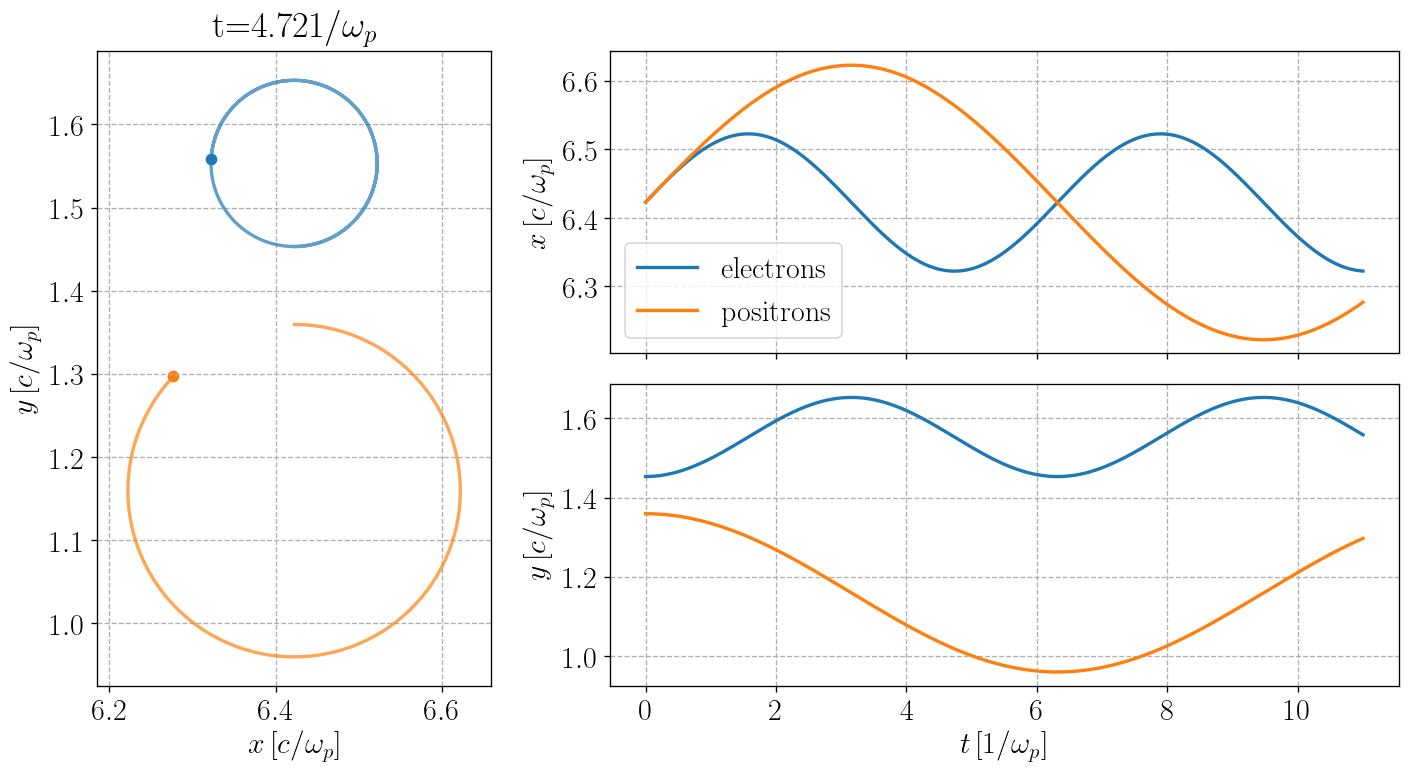

In [168]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({'font.size': 18})
mpl.rc('text', usetex = 'True')
mpl.rc('font', family = 'serif')

gs2 = gridspec.GridSpec(2, 2, hspace=0.1,width_ratios=[1, 2])

ax = plt.subplot(gs2[:, 0])
ax.plot(e_posx_t,e_posy_t,lw=2,alpha=0.7)
ax.scatter(e_posx_t[-1],e_posy_t[-1])
ax.plot(p_posx_t,p_posy_t,lw=2,alpha=0.7)
ax.scatter(p_posx_t[-1],p_posy_t[-1])
ax.grid(True,ls="--")
ax.set_xlabel("$x\,[c/\omega_p]$")
ax.set_ylabel("$y\,[c/\omega_p]$")
ax.set_aspect('equal', 'datalim')
ax.set_title("t={:.2f}$1/\omega_p$".format(sim.t))

ax2 = plt.subplot(gs2[0,1])
ax2.plot(t,e_posx_t,lw=2,label="electrons")
ax2.plot(t,p_posx_t,lw=2,label="positrons")
ax2.set_xticklabels([])
ax2.grid(True,ls="--")
ax2.set_ylabel("$x\,[c/\omega_p]$")
ax2.legend()

ax3 = plt.subplot(gs2[1,1])
ax3.plot(t,e_posy_t,lw=2)
ax3.plot(t,p_posy_t,lw=2)
ax3.set_ylabel("$y\,[c/\omega_p]$")
ax3.set_xlabel("$t\,[1/\omega_p]$")
ax3.grid(True,ls="--")
plt.show()

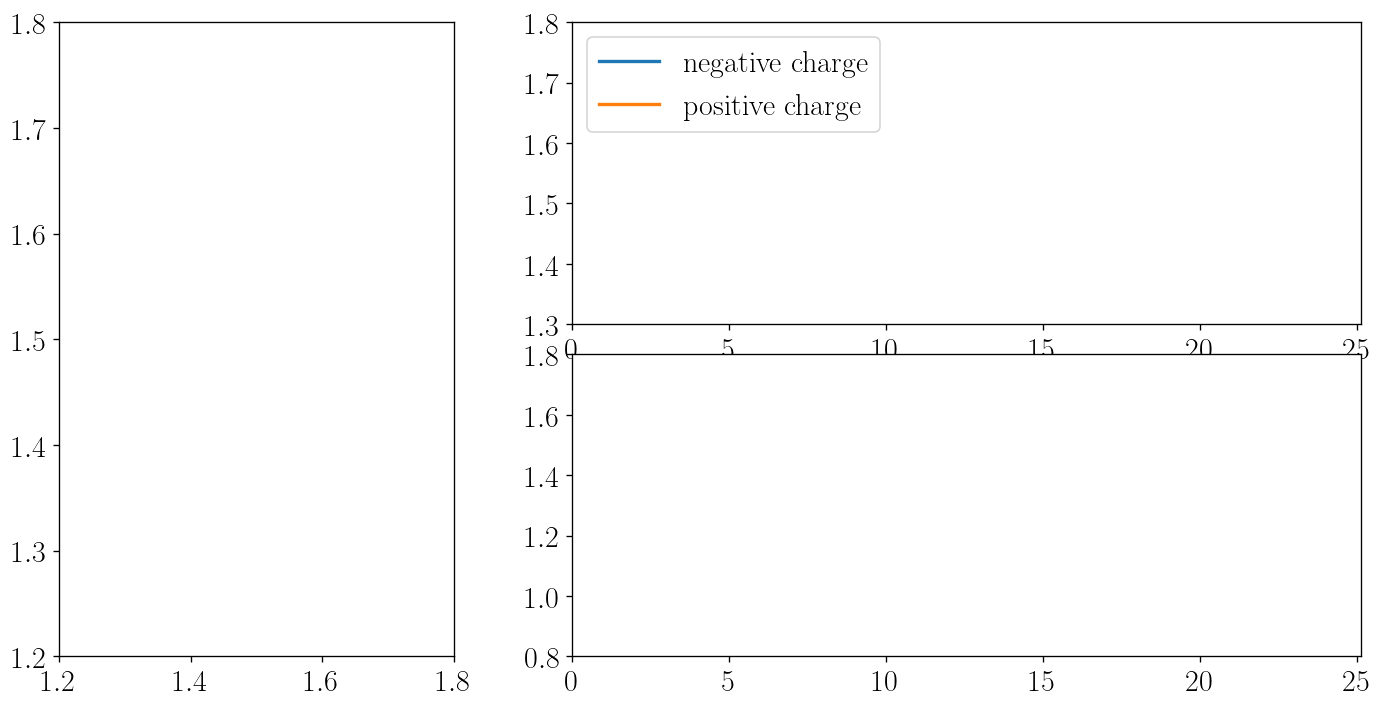

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

import numpy as np
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation
#fig, axes = plt.subplots(2)

fig=plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({'font.size': 18})
mpl.rc('text', usetex = 'True')
mpl.rc('font', family = 'serif')

gs2 = gridspec.GridSpec(2, 2, hspace=0.1,width_ratios=[1, 2])

ax = plt.subplot(gs2[:, 0],xlim=(1.2,1.8),ylim=(1.2,1.8))
line1,=ax.plot([],[],lw=2,alpha=0.7,c="C0")
point1=ax.scatter([],[],color="C0")

line2,=ax.plot([],[],lw=2,alpha=0.7,c="C1")
point2=ax.scatter([],[],color="C1")

ax2 = plt.subplot(gs2[0,1],xlim=(0,t[-1]),ylim=(1.3,1.8))
#lineg,=ax2.plot([],[],lw=2,c='k',ls='--')
line3,=ax2.plot([],[],lw=2,label="negative charge",c="C0")
line4,=ax2.plot([],[],lw=2,label="positive charge",c="C1")
ax2.legend(loc=2)

ax3 = plt.subplot(gs2[1,1],xlim=(0,t[-1]),ylim=(0.8,1.8))
line5,=ax3.plot([],[],lw=2,c="C0")
line6,=ax3.plot([],[],lw=2,c="C1")


def init():
    line1.set_data([],[])
    return line1,

def animate(i):
    #print(i,"of",len(t-1))
    line1.set_data(e_posx_t[:i],e_posy_t[:i])
    point1.set_offsets((e_posx_t[i],e_posy_t[i]))

    line2.set_data(p_posx_t[:i],p_posy_t[:i])
    point2.set_offsets((p_posx_t[i],p_posy_t[i]))

    ax.grid(True,ls="--")
    ax.set_xlabel("$x\,[c/\omega_p]$")
    ax.set_ylabel("$y\,[c/\omega_p]$")
    ax.set_aspect('equal')
    ax.set_ylim(0.9,1.9)
    if(i%10==0):
        ax.set_title("t={:.2f}$1/\omega_p$".format(t[i]))
    #ax.text(0.5, 1.01, "t={:.2f} $1/\omega_p$".format(t[i]), transform=ax.transAxes)
    
    line3.set_data(t[:i],e_posx_t[:i])
    line4.set_data(t[:i],p_posx_t[:i])
    ax2.set_xticklabels([])
    ax2.grid(True,ls="--")
    ax2.set_ylabel("$x\,[c/\omega_p]$")
    #ax2.legend(loc=2)
    
    line5.set_data(t[:i],e_posy_t[:i])
    line6.set_data(t[:i],p_posy_t[:i])
    ax3.set_ylabel("$y\,[c/\omega_p]$")
    ax3.set_xlabel("$t\,[1/\omega_p]$")
    ax3.grid(True,ls="--")
    print(i,"of",len(t),end="\r")
    return line1,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=5, blit=True)

In [26]:
HTML(anim.to_html5_video())

In [33]:
anim.save("cycl.mp4")